**Daily Average using Neural Prophet with Future Forecast**

In [33]:
# import daily data
import pandas as pd
raw_day = pd.read_csv('/Users/brookegrantham/Documents/a2cdata.csv')
conv_data = pd.DataFrame({'ds': raw_day.Date, 'y':raw_day.Open.astype(int)})

In [32]:
raw_day

,Date,Open,High,Low,Close,Volume
0,04/01/2022,203,238,179,220,118075
1,05/01/2022,219,242,196,212,117591
2,06/01/2022,242,242,186,216,118054
3,07/01/2022,187,237,185,206,118730
4,10/01/2022,202,233,184,211,118508
...,...,...,...,...,...,...
76,25/04/2022,120,145,109,140,118778
77,26/04/2022,110,147,110,147,118181
78,27/04/2022,147,147,111,140,118796
79,28/04/2022,125,141,105,133,118770


In [37]:
from neuralprophet import NeuralProphet
clf = NeuralProphet(n_lags=5, n_forecasts=5,
                                  yearly_seasonality=False,
                                  weekly_seasonality=True,
                                  daily_seasonality=True)

In [38]:
model = clf.fit(conv_data, freq='D')
forecast = clf.predict(conv_data)

WARNING - (py.warnings._showwarnmsg) - /Users/brookegrantham/Documents/Data Science MSc 2021-2022/PyInt/lib/python3.9/site-packages/neuralprophet/df_utils.py:389: UserWarning: Parsing '13/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - /Users/brookegrantham/Documents/Data Science MSc 2021-2022/PyInt/lib/python3.9/site-packages/neuralprophet/df_utils.py:389: UserWarning: Parsing '14/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - /Users/brookegrantham/Documents/Data Science MSc 2021-2022/PyInt/lib/python3.9/site-packages/neuralprophet/df_utils.py:389: UserWarning: Parsing '17/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.l

ValueError: More than 30 consecutive missing values encountered in column y. 1 NA remain. Please preprocess data manually.

In [30]:
conv_data

,ds,y
0,04/01/2022,220
1,05/01/2022,212
2,06/01/2022,216
3,07/01/2022,206
4,10/01/2022,211
...,...,...
76,25/04/2022,140
77,26/04/2022,147
78,27/04/2022,140
79,28/04/2022,133


In [39]:
future = clf.make_future_dataframe(conv_data, n_historic_predictions=True,periods=5)
future_forecast = clf.predict(future)

WARNING - (py.warnings._showwarnmsg) - /Users/brookegrantham/Documents/Data Science MSc 2021-2022/PyInt/lib/python3.9/site-packages/neuralprophet/df_utils.py:864: UserWarning: Parsing '13/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  converted_ds = pd.to_datetime(ds_col).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/brookegrantham/Documents/Data Science MSc 2021-2022/PyInt/lib/python3.9/site-packages/neuralprophet/df_utils.py:864: UserWarning: Parsing '14/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  converted_ds = pd.to_datetime(ds_col).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/brookegrantham/Documents/Data Science MSc 2021-2022/PyInt/lib/python3.9/site-packages/neuralprophet/df_utils.py:864: UserWarning: Parsing '17/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consiste

ValueError: Model has not been fitted. Predictions will be random.

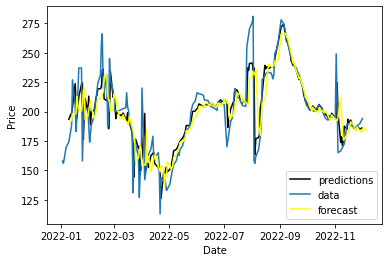

In [47]:
from matplotlib import pyplot as plt
plt.plot(forecast['ds'],forecast['yhat1'], label='predictions', color='black')
plt.plot(future_forecast['ds'],future_forecast['y'],label='data')
plt.plot(future_forecast['ds'],future_forecast['yhat3'], label='forecast', color='yellow')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [46]:
future_forecast

,ds,y,yhat1,residual1,yhat2,residual2,yhat3,residual3,ar1,ar2,ar3,trend,season_weekly,season_daily
0,2022-01-03,158.000000,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None
1,2022-01-04,156.000000,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None
2,2022-01-05,160.571429,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None
3,2022-01-06,165.142857,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None
4,2022-01-07,169.714286,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2022-11-30,192.473684,185.926575,-6.54711,184.246887,-8.226797,183.17688,-9.296804,26.418116,24.738441,23.668428,-39.080429,47.527882,151.060989
238,2022-12-01,194.000000,186.066742,-7.933258,184.390106,-9.609894,183.206757,-10.793243,27.189495,25.512867,24.3295,-39.343796,47.160042,151.060989
239,2022-12-02,NaN,189.547394,NaN,188.133453,NaN,186.924835,NaN,27.690395,26.276428,25.067827,-39.607147,50.403179,151.060989
240,2022-12-05,NaN,None,NaN,185.505264,NaN,184.385254,NaN,None,26.766937,25.646938,-40.397186,48.074516,151.060989
